[[ 40]
 [ 98]
 [ 62]
 [ 23]
 [124]
 [203]]
[383.75 330.  ]
[451.75 272.  ]
[214. 257.]
[316.  198.5]
[409.75 174.25]
[210.5 166.5]


/opt/anaconda3/lib/python3.8/site-packages/matplotlib/text.py:1163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


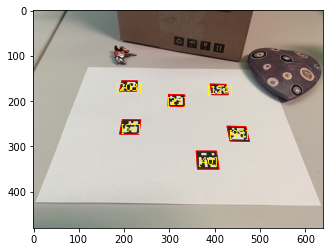

In [2]:
import cv2
import cv2.aruco as aruco
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# markerIds = []
# markerCorners = []
# rejectedCandidates = []

# print(aruco.detectMarkers.__dir__())
# params = aruco.DetectorParameters_create()
dictionary = aruco.getPredefinedDictionary(aruco.DICT_6X6_250)

im = cv2.imread('../img/aruco_markers.jpg')

markerCorners, markerIds , rejectedCandidates = aruco.detectMarkers(im, dictionary)

im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

print(markerIds)
# print(np.array(markerCorners).mean(axis=2))


# Create figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(im)

for idx, i in enumerate(markerCorners):
    for j in i:
        # Create a Rectangle patch
        rect = patches.Polygon(j,closed=True, linewidth=1, edgecolor='r', facecolor='none')

        # Add the patch to the Axes
        ax.add_patch(rect)
        center = j.mean(axis=0)
        print(center)
        ax.text(center[0], center[1], markerIds[idx], color='yellow', horizontalalignment='center',verticalalignment='center')

plt.show()

{40: array([[383.75, 330.  ]], dtype=float32),
 98: array([[451.75, 272.  ]], dtype=float32),
 62: array([[214., 257.]], dtype=float32),
 23: array([[316. , 198.5]], dtype=float32),
 124: array([[409.75, 174.25]], dtype=float32),
 203: array([[210.5, 166.5]], dtype=float32)}

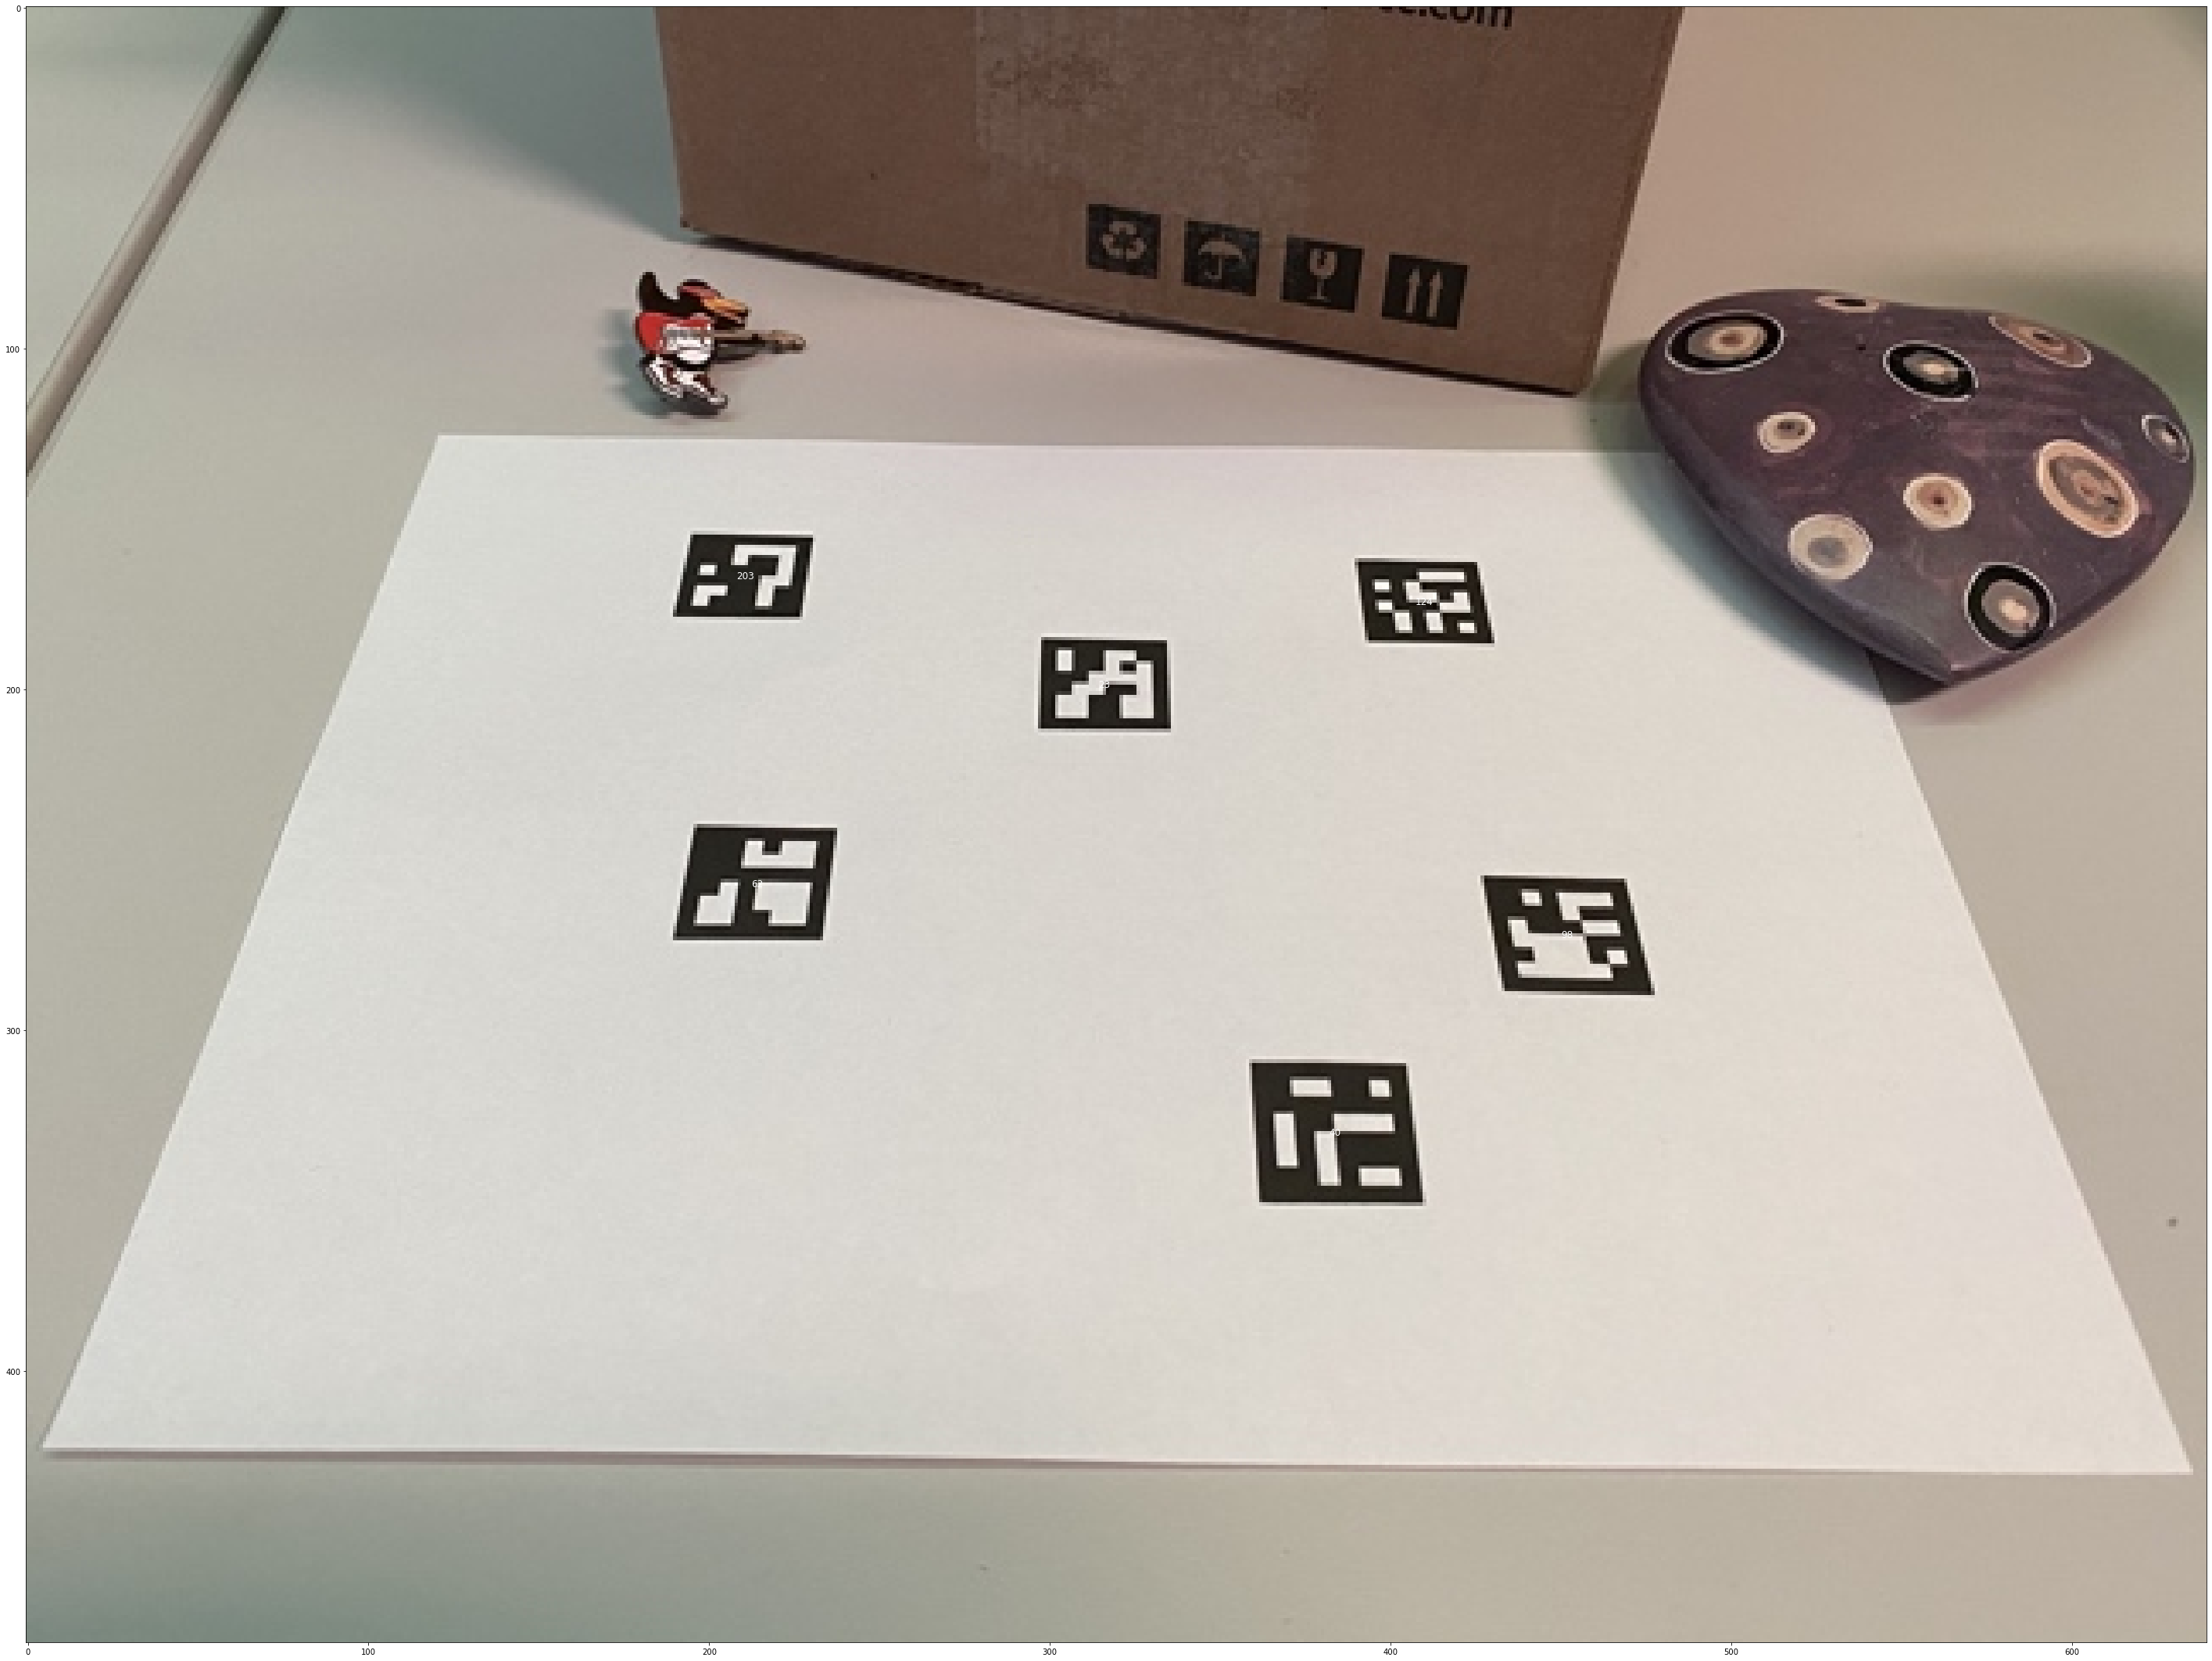

In [1]:
import robot_color_tracking as track

tracker = track.ArucoTrack()

tracker.track('../img/aruco_markers.jpg')
tracker.printRobotLocation()
tracker.getPoses()